In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

path = '/Users/hsy/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

# 꺽은선 그래프

In [3]:
cnt, PNG, UNSERBAR = 0, '.png', '_'
CHART_NAME = 'brokenLineExam'
file_nm = '../data/주요발생국가주간동향(4월2째주).csv'

In [5]:
data = pd.read_csv(file_nm, index_col='국가')

In [6]:
data

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
미국,335524,364723,387547,424945,461437,495535,524903
스페인,130709,135032,140510,146690,152446,157022,161852
이탈리아,128948,132547,135586,139422,143626,147577,152271
독일,100024,102453,107591,112113,118181,122171,124908
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991
이란,58226,60500,62589,64586,66220,68192,70029
스위스,21104,21652,22241,22789,23574,24308,24900


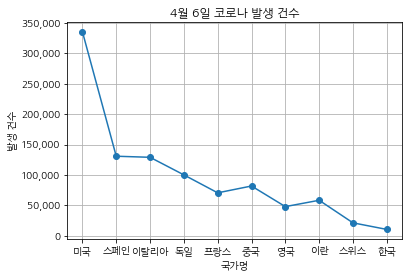

In [34]:
maxlim = (int(data['4월06일'].max() / 50000) + 1) * 50000
vals = np.arange(0, maxlim+1, 50000)

plt.plot(data['4월06일'], linestyle='solid', marker='o')
plt.yticks(vals, ['%s' % format(val, ',') for val in vals])
plt.grid()
plt.xlabel('국가명')
plt.ylabel('발생 건수')
plt.title('4월 6일 코로나 발생 건수')

cnt += 1
savefile = CHART_NAME + UNSERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=100)

In [44]:
df = data.T.loc[['4월06일', '4월07일', '4월08일', '4월09일', '4월10일'], ['스페인', '프랑스', '독일', '중국', '영국', '이란']]

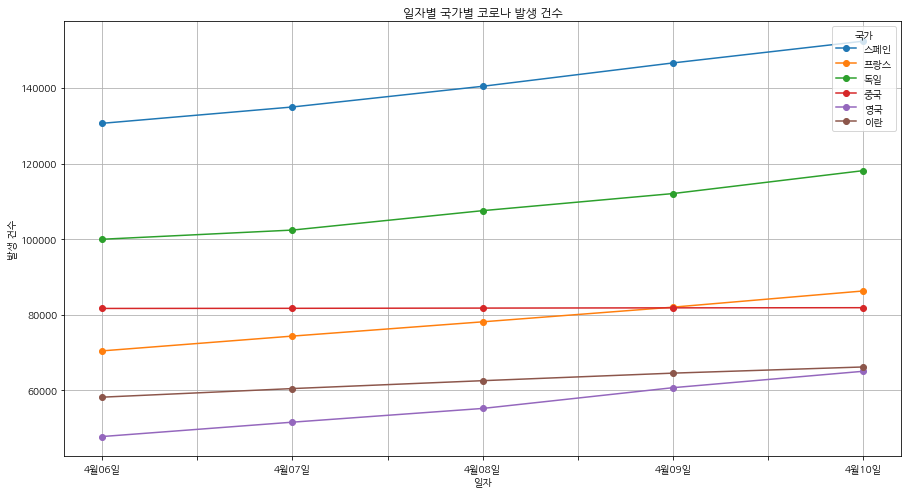

In [49]:
df.plot(figsize=(15, 8), legend=True, marker='o', rot=0)
plt.grid()
plt.xlabel('일자')
plt.ylabel('발생 건수')
plt.title('일자별 국가별 코로나 발생 건수')

cnt += 1
savefile = CHART_NAME + UNSERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=100)

# 이중 축 꺽은선 그래프

In [51]:
df = pd.read_csv('../data/tips.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [55]:
bill = df.total_bill
tip = df.tip
xrange = range(len(df))

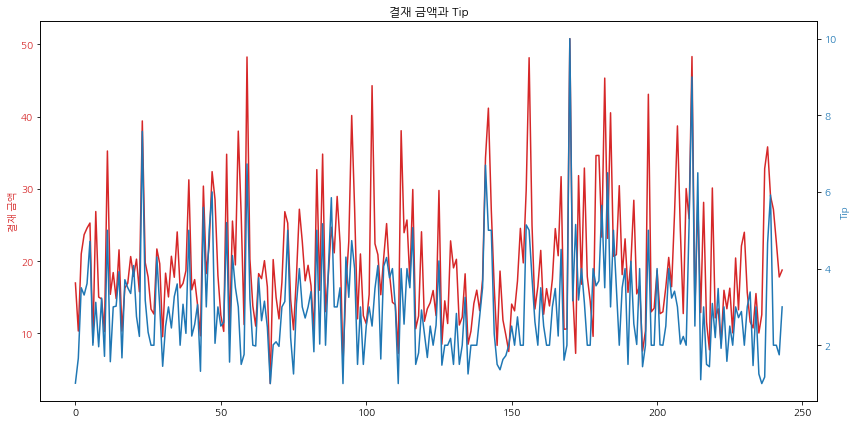

In [64]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title('결재 금액과 Tip')

color = 'tab:red'
ax1.set_ylabel('결재 금액', color=color)
ax1.plot(xrange, bill, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Tip', color=color)
ax2.plot(xrange, tip, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

cnt += 1
savefile = CHART_NAME + UNSERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=100)

# 산점도 그래프

In [6]:
cnt, PNG, UNSERBAR = 0, '.png', '_'
CHART_NAME = 'scatterPlotExam'
file_nm = '../data/mpg.csv'
plt.style.use('ggplot')

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [8]:
mpg = pd.read_csv(file_nm)

In [9]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


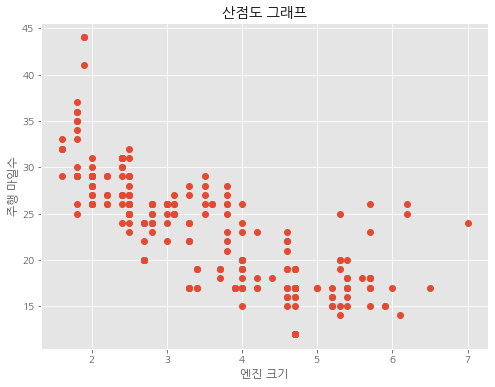

In [10]:
plt.figure(figsize=(8,6))
plt.plot(mpg.displ, mpg.hwy, marker='o', linestyle='None')
plt.xlabel('엔진 크기')
plt.ylabel('주행 마일수')
plt.title('산점도 그래프')
plt.grid(True)

cnt += 1
savefile = CHART_NAME + UNSERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)

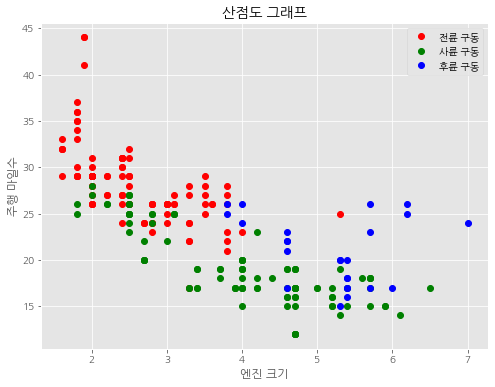

In [11]:
mcolors = ['r', 'g', 'b']
label_dict = {'f': '전륜 구동', '4': '사륜 구동', 'r': '후륜 구동'}

plt.figure(figsize=(8,6))
labels = mpg.drv.unique()

for i, item in enumerate(labels):
    x = mpg.loc[mpg.drv == item, 'displ']
    y = mpg.loc[mpg.drv == item, 'hwy']
    plt.plot(x, y, color=mcolors[i], marker='o', linestyle='None', label=label_dict[item])

plt.legend()
plt.xlabel('엔진 크기')
plt.ylabel('주행 마일수')
plt.title('산점도 그래프')
plt.grid(True)

cnt += 1
savefile = CHART_NAME + UNSERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)

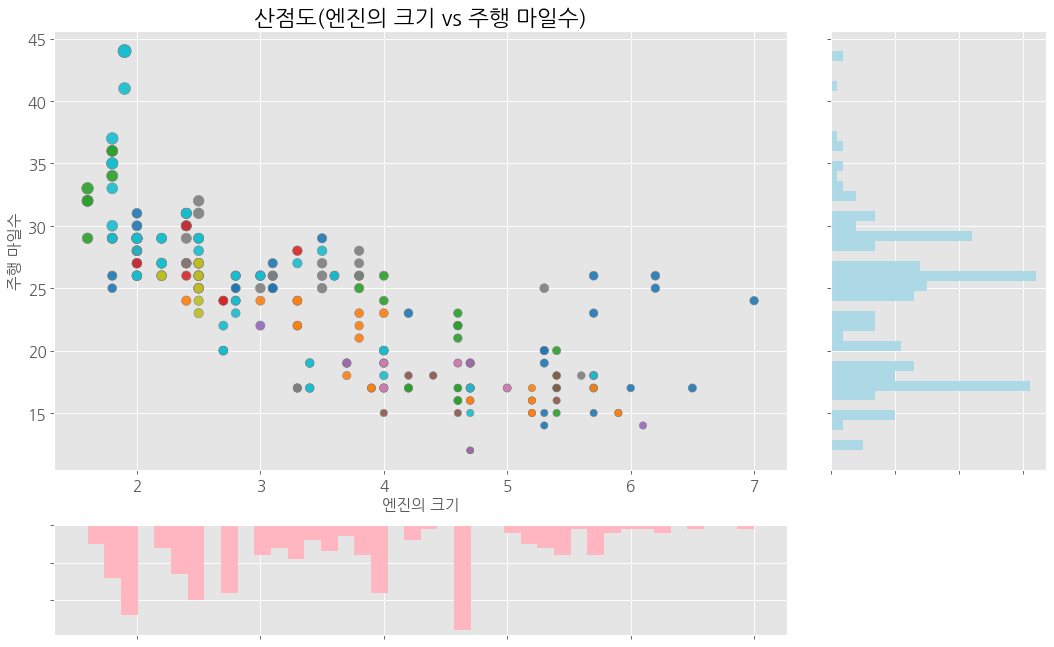

In [13]:
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# 축을 정의합니다.
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# 메인 그래프에 산점도를 그립니다.
ax_main.scatter('displ', 'hwy', s=mpg.cty*4, c=mpg.manufacturer.astype('category').cat.codes, 
                alpha=.9, data=mpg, cmap="tab10", edgecolors='gray', linewidths=.5)

# 하단의 histogram
ax_bottom.hist(mpg.displ, 40, histtype='stepfilled', orientation='vertical', color='lightpink')
ax_bottom.invert_yaxis()

# 오른쪽 histogram
ax_right.hist(mpg.hwy, 40, histtype='stepfilled', orientation='horizontal', color='lightblue')

# Decorations
ax_main.set(title='산점도(엔진의 크기 vs 주행 마일수)', xlabel='엔진의 크기', ylabel='주행 마일수')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

In [14]:
diamond_file = '../data/diamonds.csv'
diamonds = pd.read_csv(diamond_file)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [16]:
# 데이터가 매우 커서 전체의 일부분만 샘플링합니다.
FRACTION = 0.005
diamonds = diamonds.sample(frac=FRACTION)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
22262,1.04,Premium,D,VVS2,60.8,58.0,10314,6.53,6.49,3.96
36618,0.34,Premium,E,SI2,59.9,59.0,477,4.55,4.57,2.73
48010,0.54,Ideal,G,VVS2,62.0,56.0,1920,5.23,5.27,3.25
31646,0.39,Ideal,J,SI2,62.6,54.0,451,4.64,4.69,2.92
6508,0.96,Very Good,H,SI1,63.1,58.0,4064,6.20,6.25,3.93
...,...,...,...,...,...,...,...,...,...,...
11977,0.90,Ideal,F,VS2,61.6,57.0,5141,6.21,6.16,3.81
7823,1.00,Premium,D,SI2,60.8,60.0,4295,6.45,6.41,3.91
16206,1.02,Ideal,F,VS2,62.7,54.0,6479,6.42,6.50,4.05
6635,1.00,Premium,H,SI2,63.0,61.0,4088,6.35,6.31,3.99


In [17]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.797000,61.774444,57.428889,3883.055556,5.726296,5.732222,3.538556
std,0.467115,1.541753,2.273407,3699.200015,1.125457,1.119318,0.697911
min,0.210000,55.200000,51.000000,369.000000,3.870000,3.830000,2.330000
25%,0.362500,60.900000,56.000000,896.500000,4.595000,4.620000,2.832500
50%,0.735000,61.900000,57.000000,2812.000000,5.830000,5.820000,3.585000
75%,1.037500,62.700000,59.000000,5301.750000,6.530000,6.537500,4.037500
max,3.400000,67.300000,64.000000,17458.000000,9.420000,9.340000,6.270000


In [18]:
xdata = diamonds['price'] # x축
ydata = diamonds['depth'] # y축
table = diamonds['table']  # 원의 크기

In [20]:
mycolor = ['r', 'g', 'b', 'y', 'm']
cut_list = diamonds['cut'].unique()
cut_list

array(['Premium', 'Ideal', 'Very Good', 'Good', 'Fair'], dtype=object)

In [22]:
cut_dict = {cut_list[idx]:mycolor[idx] for idx in range(len(cut_list))}
print(cut_dict)

def recode_cut(cut):
    return cut_dict[cut]

# 문자열 데이터를 숫자형으로 변환
diamonds['newcut'] = diamonds['cut'].apply(recode_cut)
newcut = diamonds['newcut'] # 범주형 자료(숫자형)

{'Premium': 'r', 'Ideal': 'g', 'Very Good': 'b', 'Good': 'y', 'Fair': 'm'}


In [24]:
def recode_table(table):
    if table >= 60:
        return 100
    elif table >= 58:
        return 30
    elif table >= 54:
        return 5
    else :
        return 1
    
diamonds['newtable'] = diamonds['table'].apply(recode_table)
newtable = diamonds['newtable'] # 범주형 자료(숫자형)    

In [25]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,newcut,newtable
22262,1.04,Premium,D,VVS2,60.8,58.0,10314,6.53,6.49,3.96,r,30
36618,0.34,Premium,E,SI2,59.9,59.0,477,4.55,4.57,2.73,r,30
48010,0.54,Ideal,G,VVS2,62.0,56.0,1920,5.23,5.27,3.25,g,5
31646,0.39,Ideal,J,SI2,62.6,54.0,451,4.64,4.69,2.92,g,5
6508,0.96,Very Good,H,SI1,63.1,58.0,4064,6.20,6.25,3.93,b,30
...,...,...,...,...,...,...,...,...,...,...,...,...
11977,0.90,Ideal,F,VS2,61.6,57.0,5141,6.21,6.16,3.81,g,5
7823,1.00,Premium,D,SI2,60.8,60.0,4295,6.45,6.41,3.91,r,100
16206,1.02,Ideal,F,VS2,62.7,54.0,6479,6.42,6.50,4.05,g,5
6635,1.00,Premium,H,SI2,63.0,61.0,4088,6.35,6.31,3.99,r,100


Text(0, 0.5, 'Depth')

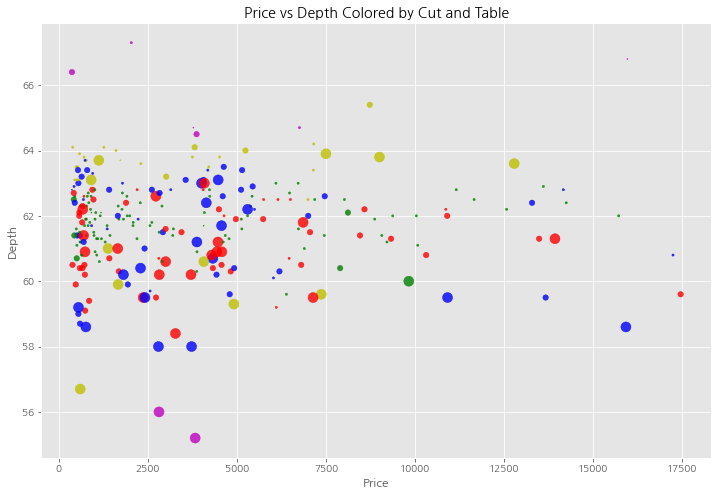

In [27]:
import matplotlib.pyplot as plt
scatter_plot = plt.figure(figsize=(12,8))
ax1 = scatter_plot.add_subplot(1, 1, 1)

# 매개 변수
# 's'는 도형의 크기를 지정합니다.
# 'c'는 색상 이름 또는 숫자의 연속형이면 됩니다.
ax1.scatter(x=xdata, y=ydata, s=newtable, c=newcut, alpha=0.8)

ax1.set_title('Price vs Depth Colored by Cut and Table')
ax1.set_xlabel('Price')
ax1.set_ylabel('Depth')

# Bar graph

In [28]:
data = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col='국가')
data.columns

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [29]:
data

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
미국,335524,364723,387547,424945,461437,495535,524903
스페인,130709,135032,140510,146690,152446,157022,161852
이탈리아,128948,132547,135586,139422,143626,147577,152271
독일,100024,102453,107591,112113,118181,122171,124908
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991
이란,58226,60500,62589,64586,66220,68192,70029
스위스,21104,21652,22241,22789,23574,24308,24900


In [30]:
chartdata = data['4월06일']
chartdata

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64

In [34]:
# plt.bar() 메소드를 사용한 막대 그래프
def MakeBarChart01(x, y, color, xlabel, ylabel, title):
    plt.figure(figsize=(10,6))
    plt.bar(x, y, color=color, alpha=0.7)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # plt.grid(True)

    YTICKS_INTERVAL = 50000

    maxlim = (int(y.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
    print(maxlim)

    values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)

    plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # 그래프 위에 건수와 비율 구하기
    ratio = 100 * y / y.sum()
    print(ratio)
    

    plt.rc('font', size=6)
    for idx in range(y.size):
        value = format(y[idx], ',') + '건'  # 예시 : 60건
        ratioval = '%.1f%%' % (ratio[idx])  # 예시 : 20.0%
        # 그래프의 위에 "건수" 표시
        plt.text(x=idx, y=y[idx] + 1, s=value, horizontalalignment='center')
        # 그래프의 중간에 비율 표시
        plt.text(x=idx, y=y[idx] / 2, s=ratioval, horizontalalignment='center')

    # 평균 값을 수평선으로 그리기
    meanval = y.mean()
    print(meanval)

    average = '평균 : %d건' % meanval
    plt.axhline(y=meanval, color='r', linewidth=1, linestyle='dashed')
    plt.text(x=y.size - 1, y=meanval + 200, s=average, horizontalalignment='center')

# def MakeBarChart01

In [35]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
mycolor = colors[0:len(chartdata)]

350000
국가
미국      34.069888
스페인     13.272496
이탈리아    13.093680
독일      10.156670
프랑스      7.156500
중국       8.296820
영국       4.854332
이란       5.912403
스위스      2.142949
한국       1.044261
Name: 4월06일, dtype: float64
98481.1


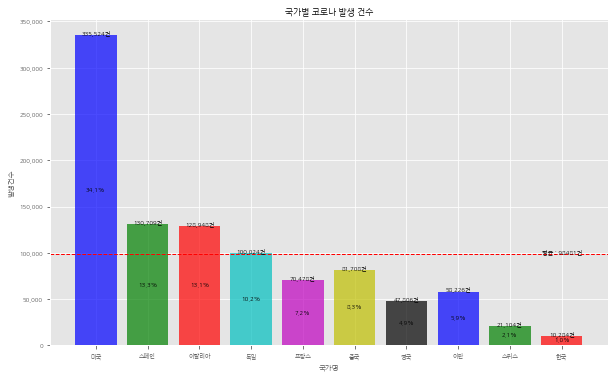

In [36]:
MakeBarChart01(x=chartdata.index, y=chartdata, color=mycolor, xlabel='국가명', 
               ylabel='발생건수', title='국가별 코로나 발생 건수')

In [46]:
# 데이터 프레임을 사용하여 막대 그래프를 그려 주는 함수입니다.
def MakeBarChart02(chartdata, rotation, title, ylim=None, stacked=False, yticks_interval = 10000):
    plt.figure()
    # 범례에 제목을 넣으려면 plot() 메소드의 legend 옵션을 사용해야 합니다.
    chartdata.plot(kind='bar', rot=rotation, title=title, legend=True, stacked=stacked, figsize=(12,6))

    plt.legend(loc='best')

    print(chartdata)

    if stacked == False :
        # max(chartdata.max())은 항목들 값 중에서 최대 값을 의미합니다.
        maxlim = (int(max(chartdata.max()) / yticks_interval) + 1) * yticks_interval
    else : # 누적 막대 그래프
        # 국가별 누적 합인 chartdata.sum(axis=1))의 최대 값에 대한 연산이 이루어 져야 합니다.
        maxlim = (int(max(chartdata.sum(axis=1)) / yticks_interval) + 1) * yticks_interval

    values = np.arange(0, maxlim + 1, yticks_interval)
    plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # y축의 상하한 값이 주어 지는 경우에만 설정합니다.
    if ylim != None :
        plt.ylim(ylim)

In [38]:
COUNTRY = ['프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일']
data = data.loc[COUNTRY, WHEN]
data.index.name = '국가명'
data.columns.name = '일자'
data

일자,4월06일,4월07일,4월08일
국가명,,,
프랑스,70478,74390,78167
중국,81708,81740,81802
영국,47806,51608,55242
이란,58226,60500,62589


일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589


<Figure size 432x288 with 0 Axes>

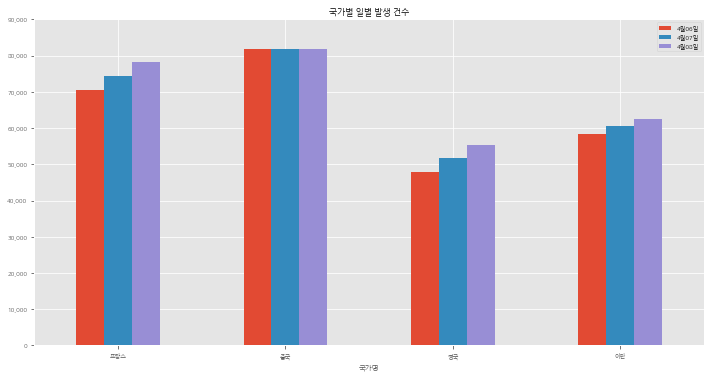

In [47]:
MakeBarChart02(chartdata=data, rotation=0, title='국가별 일별 발생 건수' )

국가명      프랑스     중국     영국     이란
일자                               
4월06일  70478  81708  47806  58226
4월07일  74390  81740  51608  60500
4월08일  78167  81802  55242  62589


<Figure size 432x288 with 0 Axes>

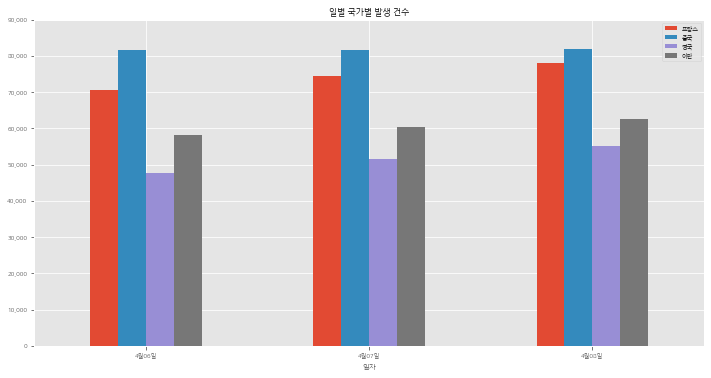

In [48]:
# 전치 프레임을 그래프로 그려 보기
dataT = data.T
MakeBarChart02(chartdata=dataT, rotation=0, title='일별 국가별 발생 건수')

일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589


<Figure size 432x288 with 0 Axes>

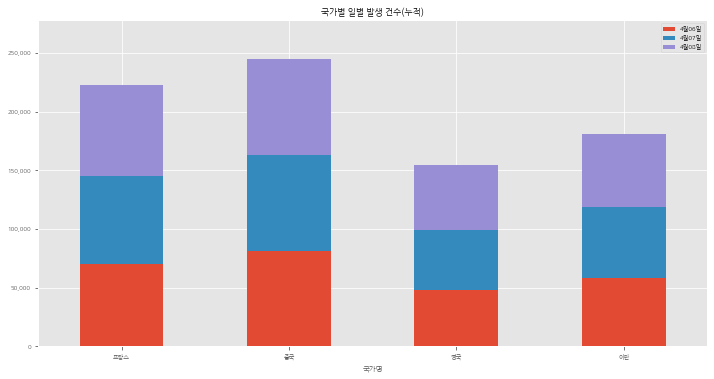

In [50]:
ymax = dataT.sum(axis=1)
ymaxlimit = ymax.max() + 10

MakeBarChart02(chartdata=data, rotation=0, title='국가별 일별 발생 건수(누적)', 
               ylim=[0, ymaxlimit], stacked=True, yticks_interval=50000)

In [53]:
data = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col='국가')
three = [item for item in data.index if item in ['프랑스', '영국', '중국']]
three

['프랑스', '중국', '영국']

In [60]:
data = data.loc[three]
data

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991


In [54]:
column_names = data.columns.tolist()
column_names

['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일']

In [61]:
# 국가별 numpy 배열을 저장하고 있는 사전
chartdata = {}

for row in data.index:
    # data.loc[row])
    # type(row))
    chartdata[row] = data.loc[row].values

chartdata

{'프랑스': array([70478, 74390, 78167, 82048, 86334, 90276, 93790]),
 '중국': array([81708, 81740, 81802, 81865, 81907, 81953, 82052]),
 '영국': array([47806, 51608, 55242, 60733, 65077, 73758, 78991])}

In [62]:
def MakeBarChart03(chartdata, column_names):
    labels = list(chartdata.keys())
    data = np.array(list(chartdata.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(column_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(column_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


    return fig, ax
# end def MakeBarChart03

(<Figure size 1080x576 with 1 Axes>, <AxesSubplot:>)

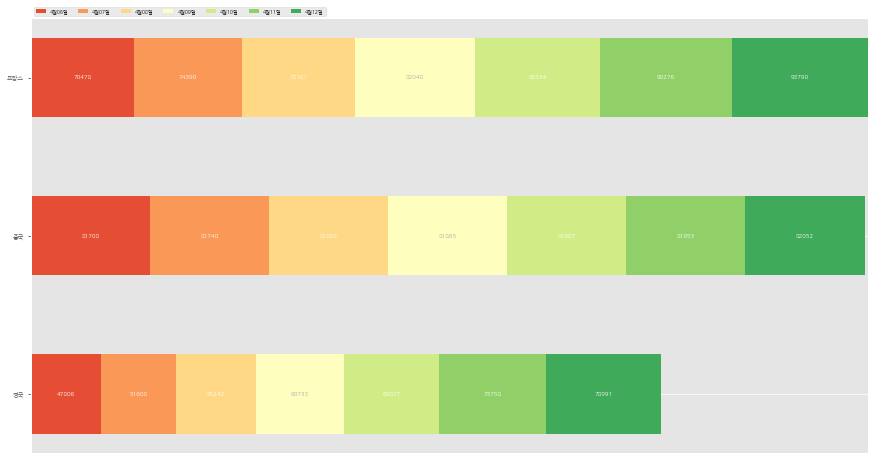

In [63]:
MakeBarChart03(chartdata, column_names)

In [66]:
def MakeBarChart04(chartdata, suptitle):
    fig, axes = plt.subplots(nrows=2, ncols=1)  # 2행 1열

    chartdata.plot(kind='bar', ax=axes[0], rot=0, alpha=0.7)

    # color='m'은 자홍색
    chartdata.plot(kind='barh', ax=axes[1], color='m', alpha=0.7)

    fig.suptitle(suptitle)  # sup : super

# end def MakeBarChart04

In [65]:
data = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col='국가')
only_usa = [item for item in data.index if item in ['미국']]

data = data.loc[only_usa].T
data

국가,미국
4월06일,335524
4월07일,364723
4월08일,387547
4월09일,424945
4월10일,461437
4월11일,495535
4월12일,524903


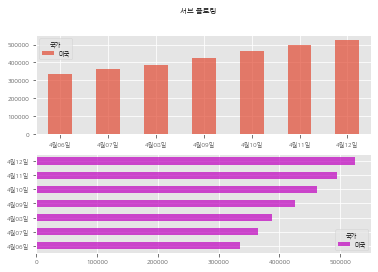

In [67]:
MakeBarChart04(chartdata=data, suptitle='서브 플로팅')

In [68]:
data = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col='국가')
COUNTRY = ['스페인', '프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']
data = data.loc[COUNTRY, WHEN]
data

,4월06일,4월07일,4월08일,4월09일,4월10일
국가,,,,,
스페인,130709,135032,140510,146690,152446
프랑스,70478,74390,78167,82048,86334
중국,81708,81740,81802,81865,81907
영국,47806,51608,55242,60733,65077
이란,58226,60500,62589,64586,66220


In [70]:
columns = [x for x in data.columns]
rows = [x for x in data.index]


[130709, 135032, 140510, 146690, 152446]
[130709. 135032. 140510. 146690. 152446.]
[70478, 74390, 78167, 82048, 86334]
[201187. 209422. 218677. 228738. 238780.]
[81708, 81740, 81802, 81865, 81907]
[282895. 291162. 300479. 310603. 320687.]
[47806, 51608, 55242, 60733, 65077]
[330701. 342770. 355721. 371336. 385764.]
[58226, 60500, 62589, 64586, 66220]
[388927. 403270. 418310. 435922. 451984.]


Text(0.5, 1.0, '테이블이 있는 막대 그래프')

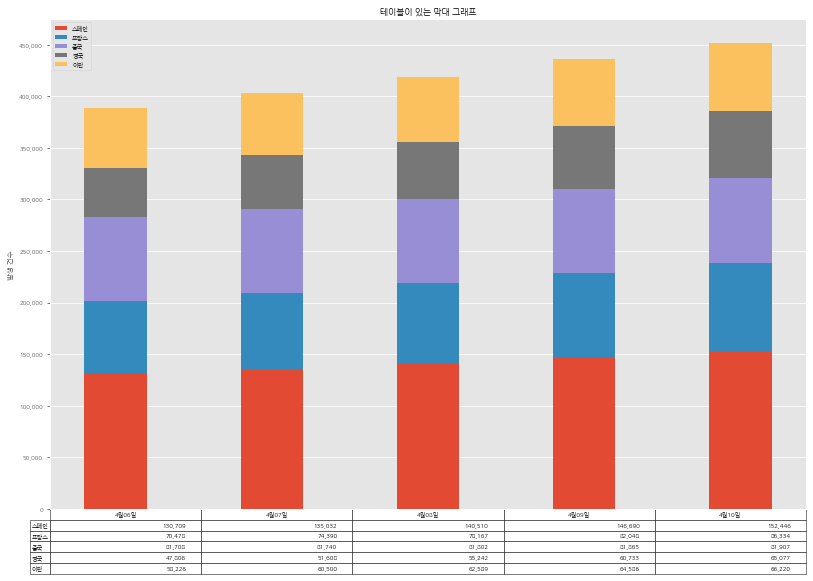

In [74]:
n_rows = len(data) # 행 수
LEFT_MARGIN = 0.3
index = np.arange(len(columns)) + LEFT_MARGIN
bar_width = 1 - 2 * LEFT_MARGIN # 막대 그래프의 너비

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = [] # 표에 들어 가는 텍스트 내용
plt.figure(figsize=(15, 10))

for row in data.index:
    # print(data[row])
    chartdata = data.loc[row].tolist()
    print(chartdata)

    # bottom
    plt.bar(index, chartdata, bar_width, bottom=y_offset, label=row)

    # y_offset에는 열 단위로 누적된 값이 들어 갑니다.
    y_offset = y_offset + chartdata
    # y_offset = chartdata
    print(y_offset)

    cell_text.append([format(x, ',') for x in chartdata])
    # cell_text.append([format(x, ',') for x in y_offset])
# end for

the_table = plt.table(cellText=cell_text, rowLabels=rows, colLabels=columns, loc='bottom')

plt.legend(loc='best')
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("발생 건수")

# values : y축의 눈금의 상한 값과 간격 지정하기
YTICKS_INTERVAL = 50000 # 단위 눈금 간격
maxlim = (int(y_offset.max()/YTICKS_INTERVAL)+1)*YTICKS_INTERVAL
maxlim

values = np.arange(0, maxlim, YTICKS_INTERVAL)

plt.yticks(values, ['%s' % format(val, ',') for val in values])
plt.xticks([])
plt.title('테이블이 있는 막대 그래프')

# Pie graph

In [75]:
filename = '../data/주요발생국가주간동향(4월2째주).csv'

In [76]:
data = pd.read_csv(filename, index_col='국가')
data

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
미국,335524,364723,387547,424945,461437,495535,524903
스페인,130709,135032,140510,146690,152446,157022,161852
이탈리아,128948,132547,135586,139422,143626,147577,152271
독일,100024,102453,107591,112113,118181,122171,124908
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991
이란,58226,60500,62589,64586,66220,68192,70029
스위스,21104,21652,22241,22789,23574,24308,24900


In [78]:
my_concern = [item for item in data.index if item in ['독일', '프랑스', '중국', '영국']]
my_concern

['독일', '프랑스', '중국', '영국']

In [90]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

Text(0.5, 1.0, '주요 국가 발생 건수')

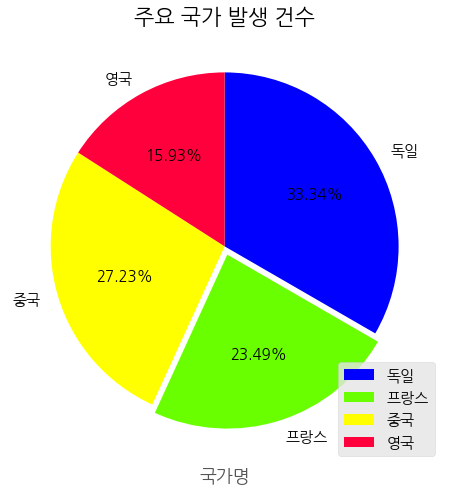

In [87]:
data = data.loc[my_concern]
chartdata = data['4월06일']
mylabel = chartdata.index
mycolors = ['blue', '#6AFF00', 'yellow', '#FF003C']

plt.figure(figsize=(10,8))

plt.pie(chartdata, labels=mylabel, shadow=False, explode=(0, 0.05, 0, 0),
        colors=mycolors, autopct='%1.2f%%', startangle=90, counterclock=False)

plt.grid(True)
plt.legend(loc=4)
plt.xlabel('국가명')
# plt.ylabel("발생 건수")
plt.title('주요 국가 발생 건수')

Text(0.5, 1.0, '주요 국가 발생 건수')

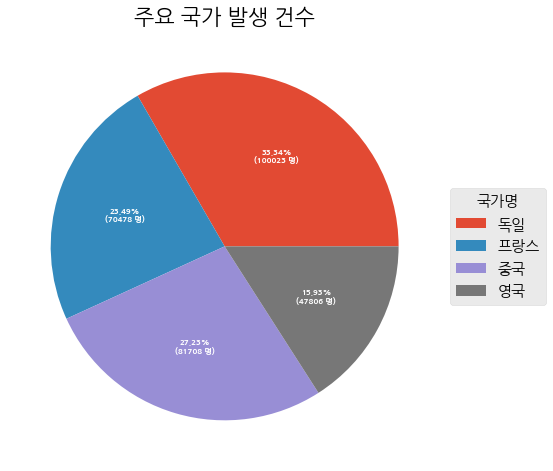

In [91]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

def getLabelFormat(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d} 명)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(chartdata, autopct=lambda pct: getLabelFormat(pct, chartdata),
                                  textprops=dict(color="w"))

ax.legend(wedges, mylabel,
          title="국가명",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("주요 국가 발생 건수")

[100024  70478  81708  47806 128948]
------------------------------
ang :  1.9716331362724304
ang :  73.5169380903244
ang :  137.37656354904175
ang :  191.7226618528366
ang :  265.8914005756378


Text(0.5, 1.0, '도우넛 그래프')

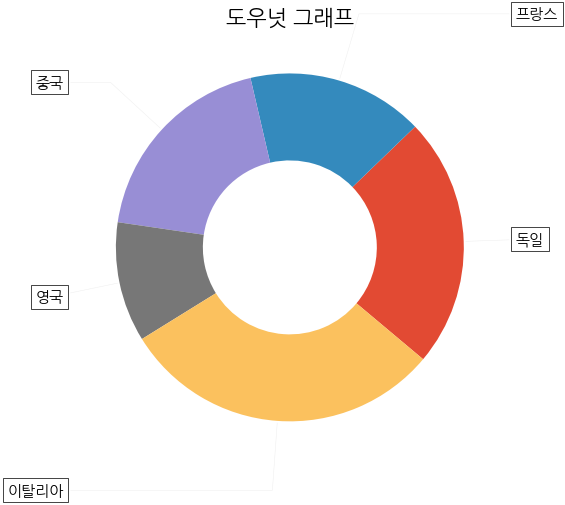

In [99]:
data = pd.read_csv(filename, index_col='국가')

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

COUNTRY = ['독일', '프랑스', '중국', '영국', '이탈리아']

data = data.loc[COUNTRY, ['4월06일']]
print(data.values.flatten())
print('-'*30)

wedges, texts = ax.pie(data.values.flatten(), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    print('ang : ', ang)
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]

    connectionstyle = "angle,angleA=0,angleB={}".format(ang)

    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    ax.annotate(COUNTRY[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("도우넛 그래프")

['이탈리아' '독일' '프랑스' '중국' '영국']
------------------------------
chartdata : 
 [[128948 132547]
 [100024 102453]
 [ 70478  74390]
 [ 81708  81740]
 [ 47806  51608]]
inner_colors : [[0.19215686 0.50980392 0.74117647 1.        ]
 [0.41960784 0.68235294 0.83921569 1.        ]
 [0.61960784 0.79215686 0.88235294 1.        ]
 [0.77647059 0.85882353 0.9372549  1.        ]
 [0.90196078 0.33333333 0.05098039 1.        ]
 [0.99215686 0.55294118 0.23529412 1.        ]
 [0.99215686 0.68235294 0.41960784 1.        ]
 [0.99215686 0.81568627 0.63529412 1.        ]
 [0.19215686 0.63921569 0.32941176 1.        ]
 [0.45490196 0.76862745 0.4627451  1.        ]]
outer_colors : [[0.19215686 0.50980392 0.74117647 1.        ]
 [0.90196078 0.33333333 0.05098039 1.        ]
 [0.19215686 0.63921569 0.32941176 1.        ]
 [0.45882353 0.41960784 0.69411765 1.        ]
 [0.38823529 0.38823529 0.38823529 1.        ]]
cum_sum :  [261495 202477 144868 163448  99414]


[None, Text(0.5, 1.0, '주요 국가별 중첩 파이 그래프')]

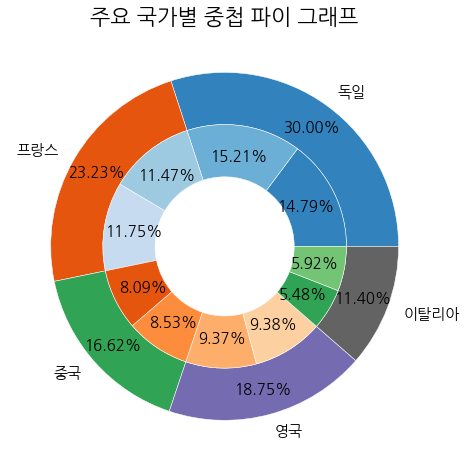

In [101]:
fig, ax = plt.subplots(figsize=(10, 8 ))

data = pd.read_csv(filename, index_col='국가')
COUNTRY = ['독일', '프랑스', '중국', '영국', '이탈리아']
my_concern = [item for item in data.index if item in COUNTRY]
data = data.loc[my_concern]

filtered_data = data[['4월06일', '4월07일']]
print(filtered_data.index.values)
print('-'*30)

totallist = [] # 차트를 그릴 중첩 데이터
for key in filtered_data.index.values :
    imsi = filtered_data.loc[key].values
    totallist.append([item for item in imsi])

chartdata = np.array(totallist)
print('chartdata : \n', chartdata)

color_su = len(COUNTRY) # 색상의 개수
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(color_su)*4)

inner_colors = cmap(np.arange(2*color_su))
print('inner_colors :', inner_colors)
print('outer_colors :', outer_colors)

cum_sum = chartdata.sum(axis=1) # 누계
print('cum_sum : ', cum_sum)

# 숫자가 적을 수록 가운데 비어 있는 원이 커집니다.
INNER_VACANT_CIRCLE_SIZE = 0.3

# OUTER_PCTDISTANCE : 비율을 보여주는 위치를 지정하는 데, 원점에서의 거리를 지정하면 됩니다.
OUTER_PCTDISTANCE = 0.85
# edgecolor='w', 'None'
ax.pie(cum_sum, radius=1, colors=outer_colors,
       wedgeprops=dict(width=INNER_VACANT_CIRCLE_SIZE, edgecolor='w'),
       labels=COUNTRY, autopct='%.2f%%', pctdistance=OUTER_PCTDISTANCE)

INNER_PCTDISTANCE = 0.75

ax.pie(chartdata.flatten(), radius=1-INNER_VACANT_CIRCLE_SIZE, colors=inner_colors,
       wedgeprops=dict(width=INNER_VACANT_CIRCLE_SIZE, edgecolor='w'),
       autopct='%.2f%%', pctdistance=INNER_PCTDISTANCE)

ax.set(aspect="equal", title='주요 국가별 중첩 파이 그래프')

# Box plot

In [102]:
filename = '../data/tips.csv'
myframe = pd.read_csv(filename, encoding='utf-8', index_col=0)

DINNER, LUNCH = 'Dinner', 'Lunch'

frame01 = myframe.loc[myframe['time'] == DINNER, 'total_bill']
frame01.index.name = DINNER

frame02 = myframe.loc[myframe['time'] == LUNCH, 'total_bill']
frame02.index.name = LUNCH


In [103]:
chartdata = [np.array(frame01), np.array(frame02)]
print('chartdata')
print(chartdata)

xtick_label = [DINNER, LUNCH] # x 축을 위한 레이블

chartdata
[array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
       18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
       26.86, 25.28, 14.73, 10.51, 17.92, 28.97, 22.49,  5.75, 16.32,
       22.75, 40.17, 27.28, 12.03, 21.01, 12.46, 11.35, 15.38, 44.3 ,
       22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.  ,  7.25,
       38.07, 23.95, 25.71, 17.31, 29.93, 14.07, 13.13, 17.26, 24.55,
       19.77, 29.85, 48.17, 25.  , 13.39, 16.49, 21.5 , 12.66, 16.21,
       13.81, 17.51, 24.52, 20.76, 31.71, 10.59, 10.63, 50.81, 15.81,
        7

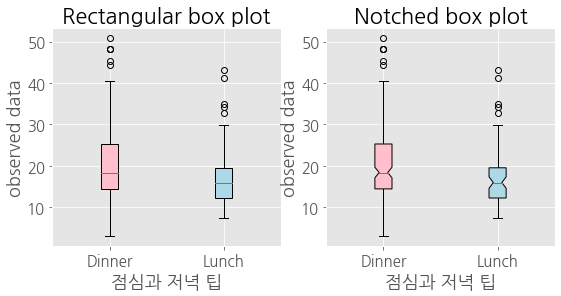

In [107]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
# rectangular box plot
bplot1 = ax1.boxplot(chartdata,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=xtick_label)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(chartdata,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=xtick_label)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

colors = ['pink', 'lightblue'] # fill with colors
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('점심과 저녁 팁')
    ax.set_ylabel('observed data')        

# histogram

In [140]:
filename = '../data/tips.csv'

Text(0, 0.5, 'Total Bill')

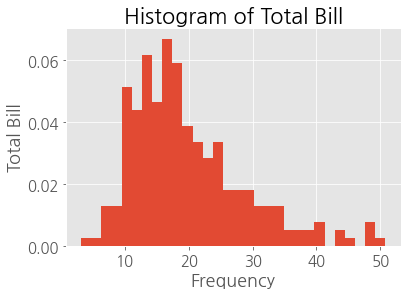

In [141]:
num_bins = 30
tips = pd.read_csv(filename, encoding='utf-8')
fig, ax = plt.subplots()
x = tips['total_bill'] # Series
n, bins, patches = ax.hist(x, num_bins, density=True)

ax.set_title('Histogram of Total Bill')
ax.set_xlabel('Frequency')
ax.set_ylabel('Total Bill')

In [142]:
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


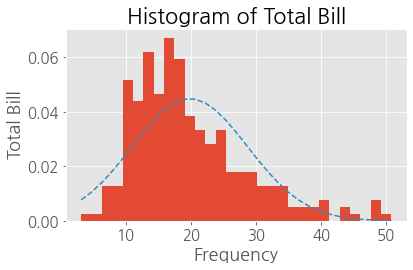

In [144]:
fig, ax = plt.subplots()
x = tips['total_bill'] # Series
n, bins, patches = ax.hist(x, num_bins, density=True)

ax.set_title('Histogram of Total Bill')
ax.set_xlabel('Frequency')
ax.set_ylabel('Total Bill')

mu = x.mean()  # 평균
sigma = x.std() # 표준 편차

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()